#Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to handle missing data
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# for handling categorical data
from sklearn.preprocessing import LabelBinarizer 
from sklearn.preprocessing import LabelEncoder 

# for seperating testing and training data
from sklearn.model_selection import train_test_split

# scaling the dataset
from sklearn.preprocessing import MinMaxScaler

# decision tree
from sklearn.tree import DecisionTreeClassifier

# for confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# for random forest
from sklearn.ensemble import RandomForestClassifier

# for Support Vector Machine
from sklearn.svm import SVC

# for Logistic Regression
from sklearn.linear_model import LogisticRegression

# for storing the trained model as a pickle file
import pickle


In [ ]:
pip install gradio

In [ ]:
# import gradio for displaying input and output as a web interface
import gradio as gr

#Functions to imporve visualization

In [2]:
def resizePlot():
  plt.figure(figsize=(12,6))

In [3]:
def resizecolor():
  plt.figure(figsize=(15,7))

# Loading the dataset

In [8]:
df = pd.read_csv("/content/Weather1.csv")

In [9]:
df.head()

,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday
0,8.0,24.3,68,29,14.4,23.6,No
1,14.0,26.9,80,36,17.5,25.7,Yes
2,13.7,23.4,82,69,15.4,20.2,Yes
3,13.3,15.5,62,56,13.5,14.1,Yes
4,7.6,16.1,68,49,11.1,15.4,Yes


# Handling Missing data

## Checking the existence of missing data

In [10]:
df.isnull().sum()

MinTemp        0
MaxTemp        0
Humidity9am    0
Humidity3pm    0
Temp9am        0
Temp3pm        0
RainToday      0
dtype: int64

## Visualizing missing data

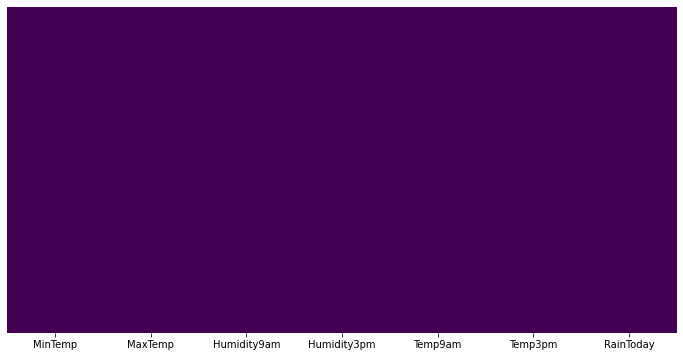

In [11]:
resizePlot()
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Plotting HeatMap to derive hidden correlations bw the columns of the dataset

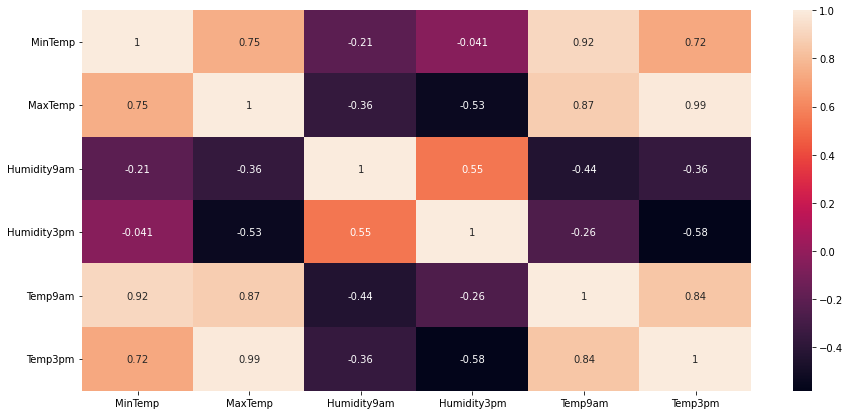

In [12]:
resizecolor()
sns.heatmap(df.corr(),annot=True)

# Finding the correlation bw variables and their dependency and drawing conclusions

**Highest correlation exists bw MinTemp & Temp9am**

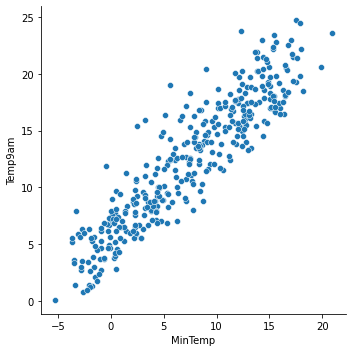

In [13]:
sns.relplot(x='MinTemp', y='Temp9am', data = df)

**Plotting same graph as above for MaxTemp & Temp3pm**

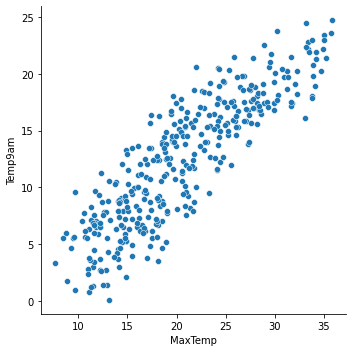

In [14]:
sns.relplot(x='MaxTemp', y='Temp9am', data = df)

# Converting Categorical Data to Numeric Data

In [15]:
le = LabelEncoder()

In [20]:
df['RainToday'] = le.fit_transform(df['RainToday'])

In [21]:
df.head()

,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday
0,8.0,24.3,68,29,14.4,23.6,0
1,14.0,26.9,80,36,17.5,25.7,1
2,13.7,23.4,82,69,15.4,20.2,1
3,13.3,15.5,62,56,13.5,14.1,1
4,7.6,16.1,68,49,11.1,15.4,1


# Training and Testing of ml algo

**Splitting the input and output variables**

In [19]:
x = df.drop('RainToday',axis=1).values
y = df['RainToday'].values

**Scaling the data**

In [42]:
# minMax = MinMaxScaler()
# x = minMax.fit_transform(x)

**Seperating the training and testing data**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

## Applying Algorithms

### Decision Tree

In [44]:
dtree = DecisionTreeClassifier()

In [46]:
dtree.fit(X_train,y_train)


# storing the trained model as a pickel file
with open("decisionTree.pkl","wb") as f:
  pickle.dump(dtree, f)


In [47]:
previsor_dtree = dtree.predict(X_test)

In [48]:
print(classification_report(y_test,previsor_dtree))
print(confusion_matrix(y_test,previsor_dtree))
print('\n')
print('Accuracy:',np.round(accuracy_score(y_test,previsor_dtree),3)*100,'%')

              precision    recall  f1-score   support

          No       0.89      0.89      0.89       104
         Yes       0.31      0.29      0.30        17

    accuracy                           0.81       121
   macro avg       0.60      0.59      0.60       121
weighted avg       0.81      0.81      0.81       121

[[93 11]
 [12  5]]


Accuracy: 81.0 %


### Random Forest

In [91]:
rfc = RandomForestClassifier(n_estimators=500)

In [92]:
rfc.fit(X_train,y_train)
# storing the trained model as a pickel file
with open("randomForest.pkl","wb") as f:
  pickle.dump(rfc, f)

In [93]:
previsor_rfc = rfc.predict(X_test)

In [94]:
print(classification_report(y_test,previsor_rfc))
print(confusion_matrix(y_test,previsor_rfc))
print('\n')
print('Acurácia:',np.round(accuracy_score(y_test,previsor_rfc),3)*100,'%')

              precision    recall  f1-score   support

          No       0.88      0.95      0.91       104
         Yes       0.38      0.18      0.24        17

    accuracy                           0.84       121
   macro avg       0.63      0.56      0.58       121
weighted avg       0.81      0.84      0.82       121

[[99  5]
 [14  3]]


Acurácia: 84.3 %


### Support Vector Machine

In [53]:
svc = SVC()

In [54]:
svc.fit(X_train, y_train)
# storing the trained model as a pickel file
with open("svm.pkl","wb") as f:
  pickle.dump(svc, f)

In [55]:
previsor_svc = svc.predict(X_test)

In [56]:
print(classification_report(y_test,previsor_svc))
print(confusion_matrix(y_test,previsor_svc))
print('\n')
print('Accuracy:',np.round(accuracy_score(y_test,previsor_svc),3)*100,'%')

              precision    recall  f1-score   support

          No       0.88      0.99      0.93       104
         Yes       0.75      0.18      0.29        17

    accuracy                           0.88       121
   macro avg       0.82      0.58      0.61       121
weighted avg       0.86      0.88      0.84       121

[[103   1]
 [ 14   3]]


Accuracy: 87.6 %


### Logistic Regression

In [57]:
LR = LogisticRegression()

In [58]:
LR.fit(X_train,y_train)
# storing the trained model as a pickel file
with open("logistic.pkl","wb") as f:
  pickle.dump(LR, f)

In [59]:
predict_LR = LR.predict(X_test)

In [60]:
print(classification_report(y_test,predict_LR))
print(confusion_matrix(y_test,predict_LR))
print('\n')
print('Accuracy:', np.round(accuracy_score(y_test,predict_LR),3)*100,'%')

              precision    recall  f1-score   support

          No       0.87      0.99      0.93       104
         Yes       0.67      0.12      0.20        17

    accuracy                           0.87       121
   macro avg       0.77      0.55      0.56       121
weighted avg       0.84      0.87      0.83       121

[[103   1]
 [ 15   2]]


Accuracy: 86.8 %


### Concluding the output from all algos

In [61]:
Accuracy_LR = np.round(accuracy_score(y_test,predict_LR),3) *100
Accuracy_svc = np.round(accuracy_score(y_test,previsor_svc),3)*100
Accuracy_rfc = np.round(accuracy_score(y_test,previsor_rfc),3)*100
Accuracy_dtree = np.round(accuracy_score(y_test,previsor_dtree),3)*100

In [62]:
print('Accuracy_Decision_tree: ',Accuracy_dtree,'%')
print('Accuracy_Random_Forest: ', Accuracy_rfc,'%')
print('Accuracy_LR: ', Accuracy_LR,'%')
print('Accuracy_SVC: ', Accuracy_svc,'%')

Accuracy_Decision_tree:  81.0 %
Accuracy_Random_Forest:  82.6 %
Accuracy_LR:  86.8 %
Accuracy_SVC:  87.6 %


# We then had a better assessment of our Logistic Regression and Support Vector Machine with an 86.8% chance of not raining with this information

# Defining Functions to call the model and give the predicted value as output

## Decision Tree

Creating the function to open the pickle file and predict the output based upon the given inputs

In [ ]:
def decisionTreePrediction(MinTemp, MaxTemp, Humidity9am, Humidity3pm, Temp9am, Temp3pm):
  with open("decisionTree.pkl", "rb") as f:
    dTreeF = pickle.load(f);
    preds = dTreeF.predict([[MinTemp, MaxTemp, Humidity9am, Humidity3pm, Temp9am, Temp3pm]])

    if(preds == 1):
      return "Rain Tomorrow"
    else:
      return "No Rain Tomo"

## Random Forest

Creating the function to open the pickle file and predict the output based upon the given inputs

In [ ]:
def randomForestPrediction(MinTemp, MaxTemp, Humidity9am, Humidity3pm, Temp9am, Temp3pm):
  with open("randomForest.pkl", "rb") as f:
    rfcF = pickle.load(f);
    preds = rfcF.predict([[MinTemp, MaxTemp, Humidity9am, Humidity3pm, Temp9am, Temp3pm]])

    if(preds == 1):
      return "Rain Tomorrow"
    else:
      return "No Rain Tomorrow"

## Support Vector Machine

Creating the function to open the pickle file and predict the output based upon the given inputs

In [ ]:
def SVMPrediction(MinTemp, MaxTemp, Humidity9am, Humidity3pm, Temp9am, Temp3pm):
  with open("svm.pkl", "rb") as f:
    svmF = pickle.load(f);
    preds = svmF.predict([[MinTemp, MaxTemp, Humidity9am, Humidity3pm, Temp9am, Temp3pm]])

    if(preds == 1):
      return "Rain Tomorrow"
    else:
      return "No Rain Tomorrow"

## Logistic Regression

Creating the function to open the pickle file and predict the output based upon the given inputs

In [ ]:
def LRPrediction(MinTemp, MaxTemp, Humidity9am, Humidity3pm, Temp9am, Temp3pm):
  with open("logistic.pkl", "rb") as f:
    LRF = pickle.load(f);
    preds = LRF.predict([[MinTemp, MaxTemp, Humidity9am, Humidity3pm, Temp9am, Temp3pm]])

    if(preds == 1):
      return "Rain Tomorrow"
    else:
      return "No Rain Tomorrow"

#Creation of Web Interface

## Generating the General Gradio Component to take input and give the *output*

In [ ]:
MinTemp = gr.Number(label = "Enter the Minimum Temp")
MaxTemp = gr.Number(label = "Enter the Maximum Tenp")
Hum9Am = gr.Textbox(label = "Enter Humidity at 9 am")
Hum3Pm = gr.Textbox(label = "Enter Humidity at 3 pm")
Temp9Am = gr.Textbox(label = "Enter Temperature at 9 am")
Temp3Pm = gr.Textbox(label = "Enter Temperature at 3 pm")
output = gr.Textbox()

## Generating Web Interface for each model

### Decision Tree

In [ ]:
appDecision = gr.Interface(fn = decisionTreePrediction, inputs=[MinTemp, MaxTemp, Hum9Am, Hum3Pm, Temp9Am, Temp3Pm], outputs=output)
appDecision.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://03fa608edfea09de.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f8321dc3590>,
 'http://127.0.0.1:7871/',
 'https://03fa608edfea09de.gradio.app')

### Random Forest

In [ ]:
appRandomForest = gr.Interface(fn = randomForestPrediction, inputs=[MinTemp, MaxTemp, Hum9Am, Hum3Pm, Temp9Am, Temp3Pm], outputs=output)
appRandomForest.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://53ffadd4de9fb27b.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f831cbb9090>,
 'http://127.0.0.1:7872/',
 'https://53ffadd4de9fb27b.gradio.app')

### Support Vector Machine

In [ ]:
appSVM = gr.Interface(fn = SVMPrediction, inputs=[MinTemp, MaxTemp, Hum9Am, Hum3Pm, Temp9Am, Temp3Pm], outputs=output)
appSVM.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://d2a0e523f2681ed2.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


### Logistic Regression

In [ ]:
appLR = gr.Interface(fn = LRPrediction, inputs=[MinTemp, MaxTemp, Hum9Am, Hum3Pm, Temp9Am, Temp3Pm], outputs=output)
appLR.launch()